In [1]:
import tensorflow as tf
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

2.16.1


In [2]:
dataset = pd.read_excel('../data/pisos_scaled_data.xlsx', index_col='ID')

dataset_num = pd.read_excel('../data/pisos_datos_numericos.xlsx', index_col='ID')

In [3]:
dataset.shape

(180, 36)

---
---
# En esta versión trataremos de predecir los gastos generales al año

In [4]:
dataset = dataset.drop(['Precio alquiler al año', 'Precio alquiler aplicado al año', 'Gastos iniciales', 'Beneficios totales', 'Beneficios al año'], axis=1)

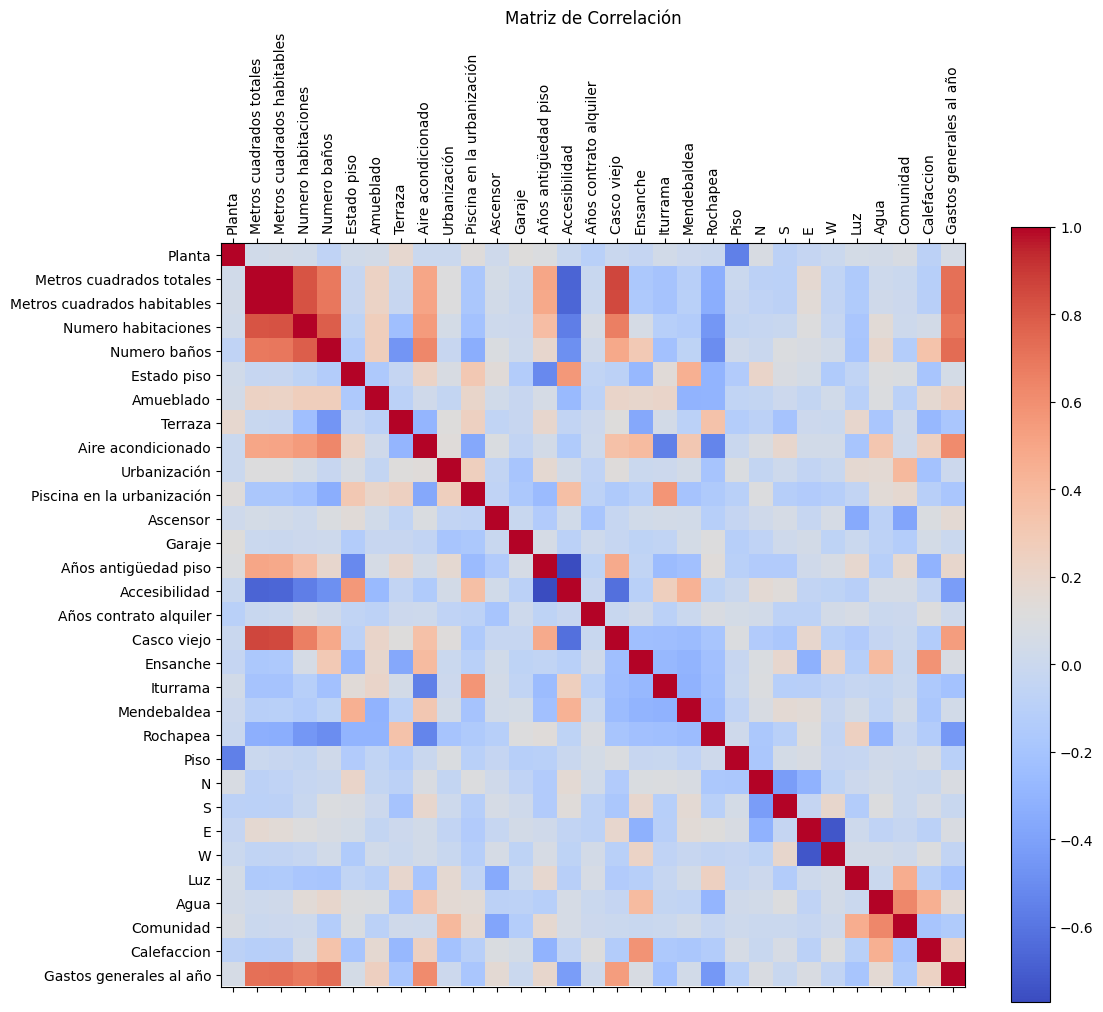

In [5]:
# Calcular la matriz de correlación
correlation_matrix = dataset.corr()

plt.figure(figsize=(12, 10))

# Crear la matriz de correlación
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.title("Matriz de Correlación")

plt.xticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=90)
plt.yticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns)

plt.show()

In [6]:
correlation_with_target = correlation_matrix.iloc[-1, :-1]

correlation_with_target

Planta                         0.060341
Metros cuadrados totales       0.719106
Metros cuadrados habitables    0.726435
Numero habitaciones            0.687460
Numero baños                   0.733578
Estado piso                    0.055871
Amueblado                      0.246155
Terraza                       -0.183660
Aire acondicionado             0.612342
Urbanización                   0.007409
Piscina en la urbanización    -0.180284
Ascensor                       0.158276
Garaje                         0.000902
Años antigüedad piso           0.196136
Accesibilidad                 -0.420623
Años contrato alquiler         0.022130
Casco viejo                    0.541332
Ensanche                       0.078590
Iturrama                      -0.211198
Mendebaldea                    0.040255
Rochapea                      -0.443424
Piso                          -0.097106
N                              0.083946
S                             -0.015519
E                              0.085249


In [7]:
# Calcular el índice de los elementos ordenados según el valor absoluto
indices_ordenados_abs = correlation_with_target.abs().argsort()[::-1]

# Usar los índices para ordenar la serie original
sort_corr = correlation_with_target.iloc[indices_ordenados_abs]

sort_corr

Numero baños                   0.733578
Metros cuadrados habitables    0.726435
Metros cuadrados totales       0.719106
Numero habitaciones            0.687460
Aire acondicionado             0.612342
Casco viejo                    0.541332
Rochapea                      -0.443424
Accesibilidad                 -0.420623
Amueblado                      0.246155
Calefaccion                    0.227993
Iturrama                      -0.211198
Años antigüedad piso           0.196136
Luz                           -0.189936
Terraza                       -0.183660
Piscina en la urbanización    -0.180284
Agua                           0.161825
Ascensor                       0.158276
Comunidad                     -0.144086
Piso                          -0.097106
E                              0.085249
N                              0.083946
Ensanche                       0.078590
Planta                         0.060341
Estado piso                    0.055871
W                             -0.049899


In [8]:
correlation_matrix

,Planta,Metros cuadrados totales,Metros cuadrados habitables,Numero habitaciones,Numero baños,Estado piso,Amueblado,Terraza,Aire acondicionado,Urbanización,Piscina en la urbanización,Ascensor,Garaje,Años antigüedad piso,Accesibilidad,Años contrato alquiler,Casco viejo,Ensanche,Iturrama,Mendebaldea,Rochapea,Piso,N,S,E,W,Luz,Agua,Comunidad,Calefaccion,Gastos generales al año
Planta,1.000000,0.034932,0.048057,0.033920,-0.059739,0.033351,0.050583,0.182457,-0.003608,-0.003438,0.122649,0.019711,0.119591,0.094685,-0.015967,-0.097594,-0.007585,-0.035770,0.038960,0.008523,-0.006901,-0.552956,0.072565,-0.085202,-0.037957,-0.002225,0.055186,0.044996,0.075070,-0.082341,0.060341
Metros cuadrados totales,0.034932,1.000000,0.993438,0.817279,0.684287,-0.028693,0.231298,-0.013701,0.497860,0.112778,-0.173008,0.056414,-0.001220,0.499209,-0.668576,-0.015714,0.856423,-0.165228,-0.202206,-0.101757,-0.329147,-0.002065,-0.082107,-0.092045,0.163328,-0.057848,-0.155776,0.013949,-0.001755,-0.111899,0.719106
Metros cuadrados habitables,0.048057,0.993438,1.000000,0.825660,0.689584,-0.021613,0.224146,-0.018346,0.507981,0.111373,-0.174909,0.042675,-0.008347,0.486878,-0.662278,-0.001887,0.847993,-0.159375,-0.203883,-0.098428,-0.329238,-0.021922,-0.060622,-0.080984,0.144788,-0.045871,-0.149044,0.029097,0.006083,-0.102098,0.726435
Numero habitaciones,0.033920,0.817279,0.825660,1.000000,0.782904,-0.068748,0.264202,-0.231200,0.544554,0.056475,-0.210866,0.012845,0.003173,0.376535,-0.561330,0.069530,0.662770,0.064664,-0.113857,-0.135278,-0.452866,-0.041919,-0.027101,-0.014431,0.113580,-0.025690,-0.182548,0.142123,0.010568,0.051379,0.687460
Numero baños,-0.059739,0.684287,0.689584,0.782904,1.000000,-0.133185,0.266013,-0.459077,0.628890,-0.023858,-0.329926,0.092508,0.013756,0.183524,-0.485450,0.029166,0.484563,0.299779,-0.216816,-0.070392,-0.496260,0.028317,-0.005966,0.096899,0.073025,0.040154,-0.189312,0.195382,-0.123307,0.342159,0.733578
Estado piso,0.033351,-0.028693,-0.021613,-0.068748,-0.133185,1.000000,-0.156187,-0.032917,0.224320,0.072686,0.306464,0.135046,-0.131025,-0.514874,0.562908,-0.056422,-0.080823,-0.276174,0.138013,0.447214,-0.299662,-0.139212,0.206915,0.084101,0.057606,-0.149027,-0.057606,0.101807,0.091502,-0.189064,0.055871
Amueblado,0.050583,0.231298,0.224146,0.264202,0.266013,-0.156187,1.000000,-0.089239,0.027695,-0.038745,0.198075,0.037600,-0.020304,0.062985,-0.262376,-0.077196,0.210079,0.194038,0.205444,-0.308410,-0.298770,-0.057602,-0.039934,0.008318,-0.041567,0.032212,-0.099703,0.095061,-0.088882,0.168919,0.246155
Terraza,0.182457,-0.013701,-0.018346,-0.231200,-0.459077,-0.032917,-0.089239,1.000000,-0.288863,0.120703,0.244527,-0.056698,-0.022497,0.188868,-0.049141,0.005135,0.114968,-0.363857,0.047702,-0.090167,0.346091,-0.127508,-0.083866,-0.198535,0.007964,-0.001345,0.184669,-0.180989,0.030440,-0.275802,-0.183660
Aire acondicionado,-0.003608,0.497860,0.507981,0.544554,0.628890,0.224320,0.027695,-0.288863,1.000000,0.133994,-0.365724,0.087643,-0.051060,0.049131,-0.146650,0.014134,0.353693,0.389652,-0.552923,0.308457,-0.531791,-0.008580,0.086118,0.185573,0.037788,0.041814,-0.187292,0.321387,0.018329,0.243343,0.612342
Urbanización,-0.003438,0.112778,0.111373,0.056475,-0.023858,0.072686,-0.038745,0.120703,0.133994,1.000000,0.253347,-0.047841,-0.185569,0.165804,0.045095,-0.064057,0.123988,-0.000975,0.009576,0.048267,-0.193318,0.088861,-0.039369,0.010737,-0.048761,-0.010803,0.165067,0.161664,0.404405,-0.205253,0.007409


In [9]:
threshold_corr = 0.15  # Umbral de correlación

# Encuentra las variables con correlación absoluta por debajo del umbral
low_correlation_vars = correlation_with_target[abs(correlation_with_target) < threshold_corr].index

# Elimina las variables con correlación baja del DataFrame original
filtered_data = dataset.drop(columns=low_correlation_vars)

print(filtered_data.columns)

Index(['Metros cuadrados totales', 'Metros cuadrados habitables',
       'Numero habitaciones', 'Numero baños', 'Amueblado', 'Terraza',
       'Aire acondicionado', 'Piscina en la urbanización', 'Ascensor',
       'Años antigüedad piso', 'Accesibilidad', 'Casco viejo', 'Iturrama',
       'Rochapea', 'Luz', 'Agua', 'Calefaccion', 'Gastos generales al año'],
      dtype='object')


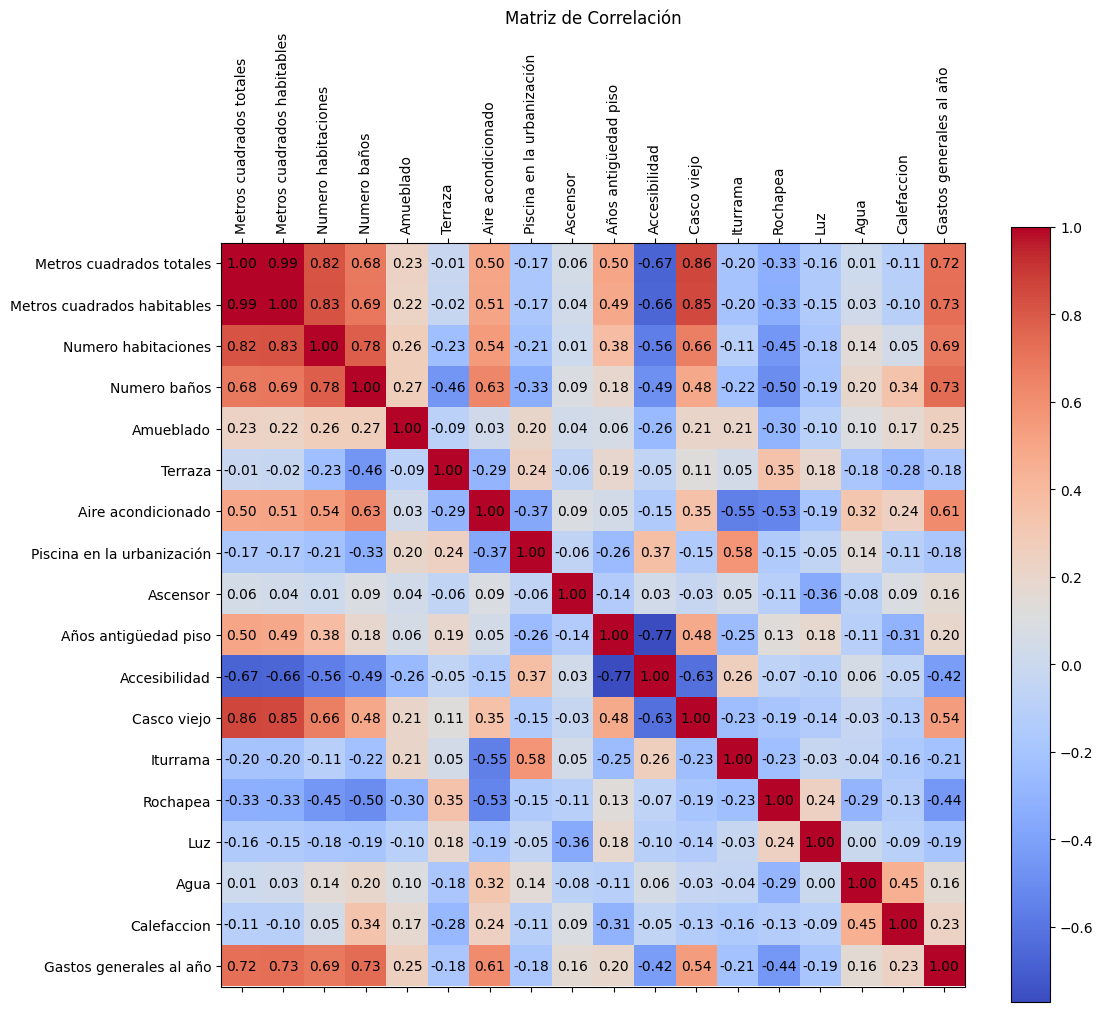

In [10]:
# Calcular la matriz de correlación
correlation_matrix = filtered_data.corr()

plt.figure(figsize=(12, 10))

# Crear la matriz de correlación
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.title("Matriz de Correlación")

# Añadir los valores de correlación como texto en cada celda
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        plt.text(j, i, "{:.2f}".format(correlation_matrix.iloc[i, j]),
                 ha='center', va='center', color='black')

plt.xticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=90)
plt.yticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns)

plt.show()

In [11]:
dataset_filtrado = filtered_data.drop(['Metros cuadrados habitables', 'Numero habitaciones', 'Numero baños', 'Casco viejo', 'Accesibilidad'], axis=1)

In [12]:
dataset_filtrado = dataset_filtrado.drop(['Iturrama', 'Rochapea', 'Terraza'], axis=1)

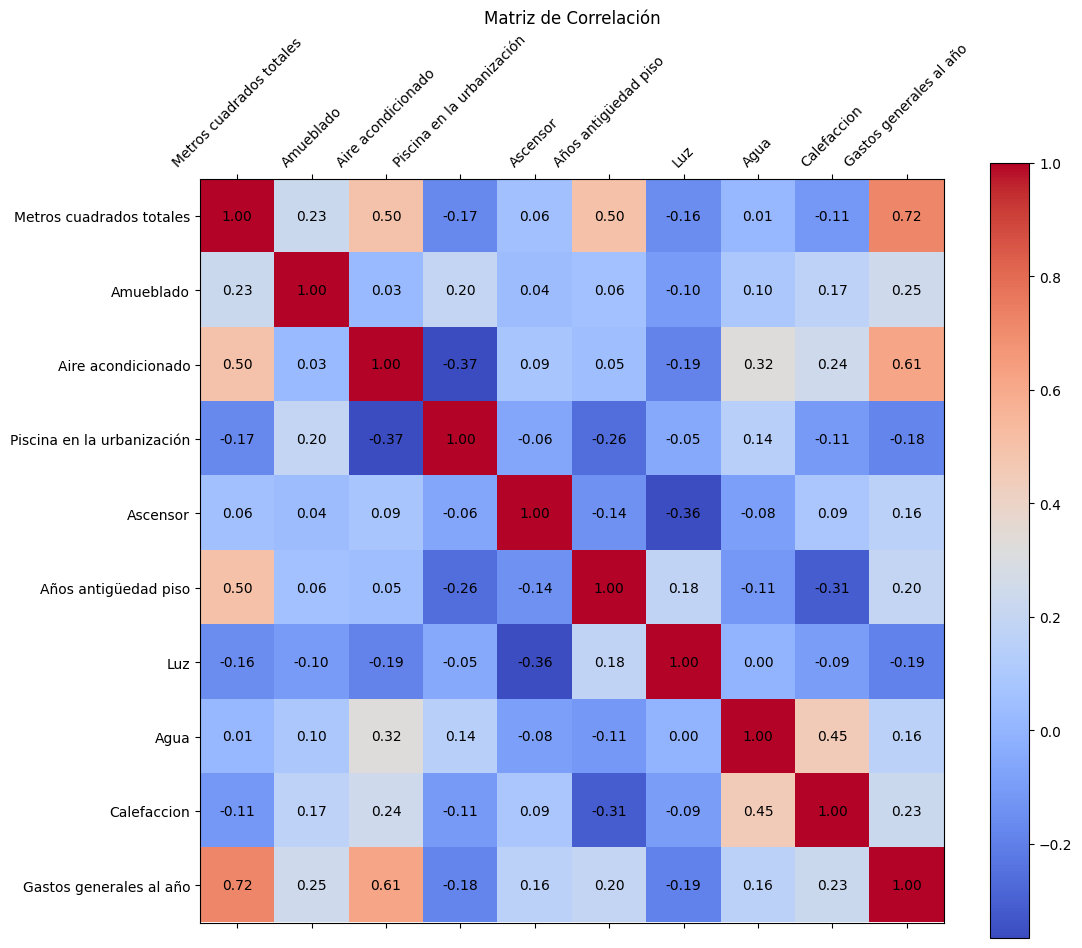

In [13]:
# Calcular la matriz de correlación
correlation_matrix = dataset_filtrado.corr()

plt.figure(figsize=(12, 10))

# Crear la matriz de correlación
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.title("Matriz de Correlación")

# Añadir los valores de correlación como texto en cada celda
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        plt.text(j, i, "{:.2f}".format(correlation_matrix.iloc[i, j]),
                 ha='center', va='center', color='black')

plt.xticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=45)
plt.yticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns)

plt.show()

In [14]:
filtr = dataset_num[dataset_filtrado.columns]

filtr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 1 to 180
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Metros cuadrados totales    180 non-null    float64
 1   Amueblado                   180 non-null    int64  
 2   Aire acondicionado          180 non-null    int64  
 3   Piscina en la urbanización  180 non-null    int64  
 4   Ascensor                    180 non-null    int64  
 5   Años antigüedad piso        180 non-null    int64  
 6   Luz                         180 non-null    int64  
 7   Agua                        180 non-null    int64  
 8   Calefaccion                 180 non-null    int64  
 9   Gastos generales al año     180 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 15.5 KB


In [15]:
df1 = filtr.select_dtypes(exclude='int64')

df2 = filtr.select_dtypes(include='int64').drop(columns='Gastos generales al año')

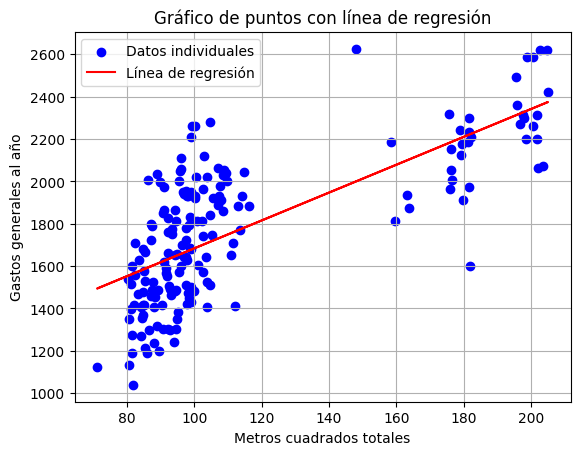

In [16]:
from sklearn.linear_model import LinearRegression

for i in df1.columns:
    # Seleccionar las dos columnas que deseas graficar
    x = dataset_num[i].values.reshape(-1, 1)
    y = dataset_num['Gastos generales al año'].values

    # Crear el modelo de regresión lineal
    regression = LinearRegression()
    regression.fit(x, y)

    # Predecir los valores de Y utilizando el modelo entrenado
    y_pred = regression.predict(x)

    # Crear la gráfica
    plt.scatter(x, y, color='blue',label='Datos individuales')  # Dibujar los puntos individuales
    plt.plot(x, y_pred, color='red', label='Línea de regresión')  # Dibujar la línea de regresión
    plt.title('Gráfico de puntos con línea de regresión')
    plt.xlabel(i)
    plt.ylabel('Gastos generales al año')
    plt.legend()  # Mostrar la leyenda
    plt.grid(True)  # Mostrar la cuadrícula en el gráfico
    plt.show()

c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


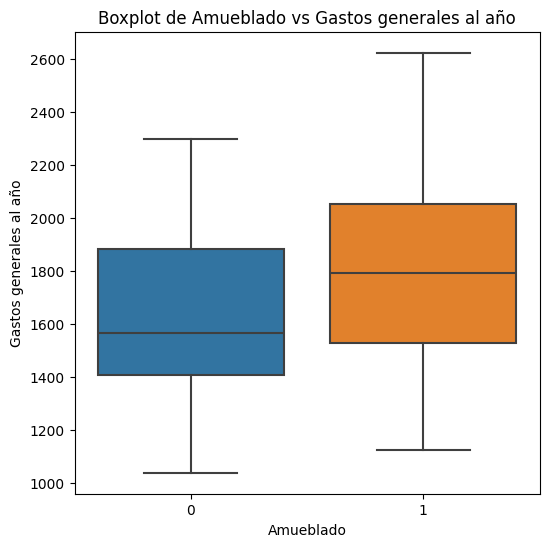

c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


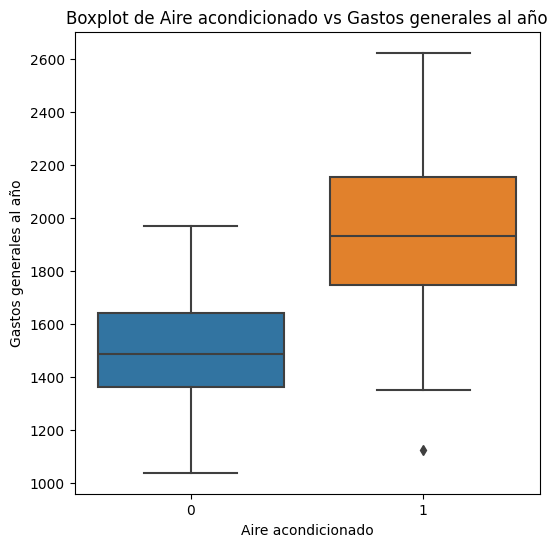

c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


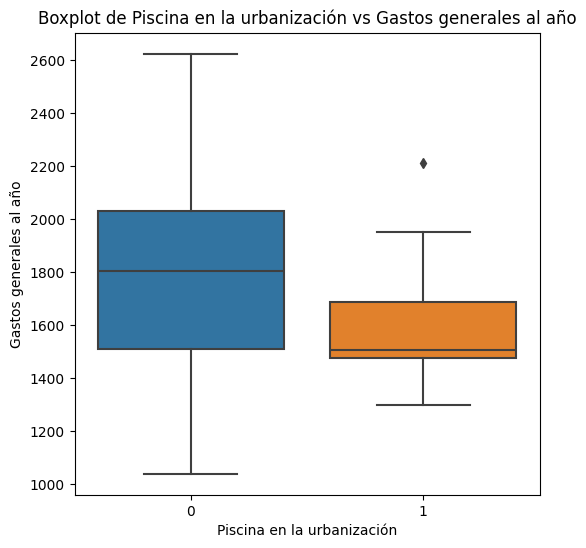

c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


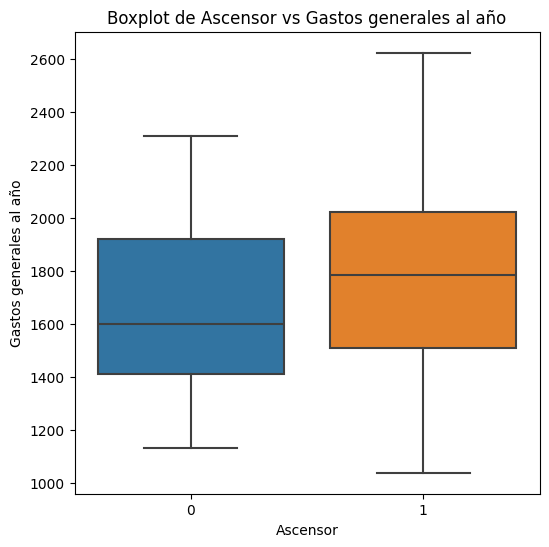

c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


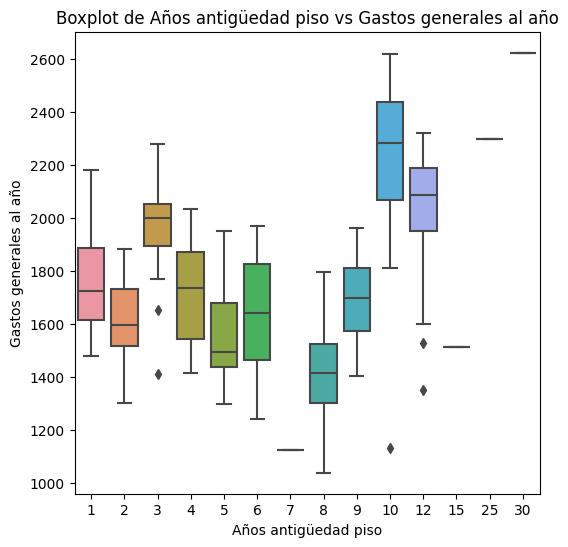

c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


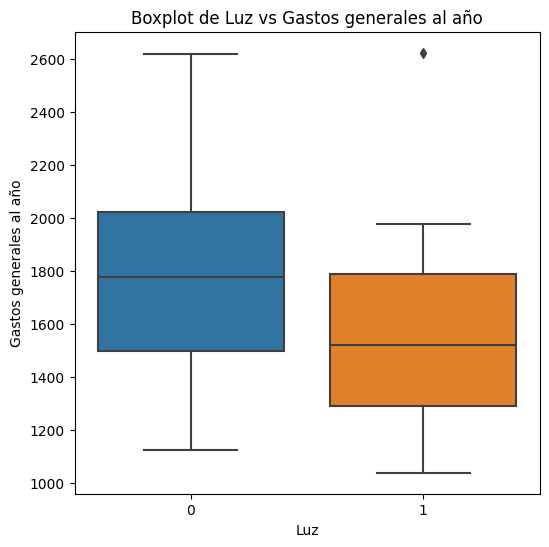

c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


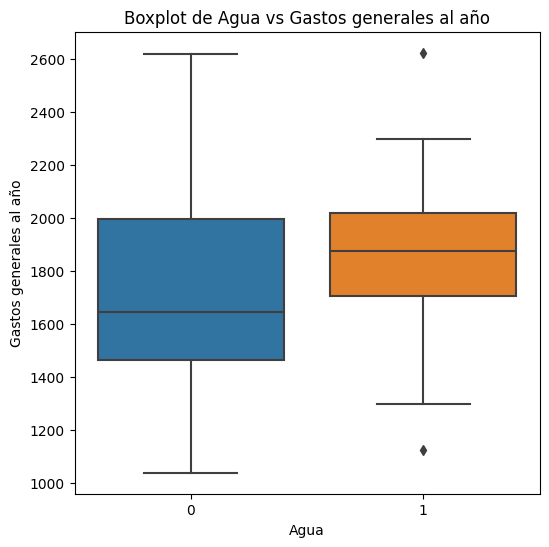

c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


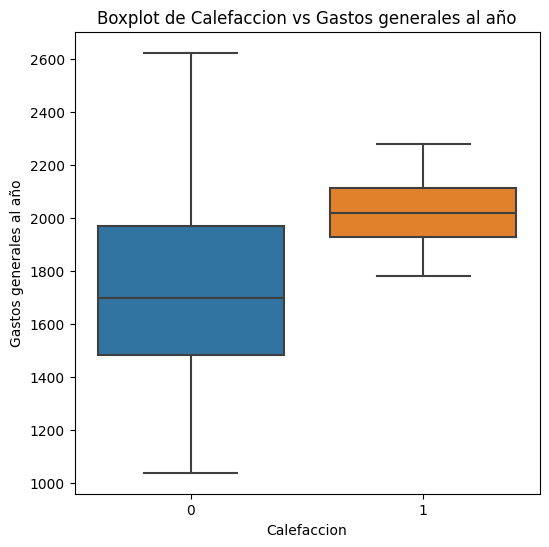

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterar sobre las columnas del DataFrame
for i in df2.columns:
    plt.figure(figsize=(6, 6))
    sns.boxplot(x=dataset_num[i], y=dataset_num['Gastos generales al año'])
    
    # Configurar la gráfica
    plt.title(f'Boxplot de {i} vs Gastos generales al año')
    plt.xlabel(i)
    plt.ylabel('Gastos generales al año')
    plt.show()

---
---

In [18]:
dir = '../data/v3.2_filtered_data'

dataset_filtrado.to_csv(dir+'.csv', index=True)
dataset_filtrado.to_excel(dir+'.xlsx', index=True)

In [19]:
dataset_filtrado.shape

(180, 10)

---
---
# Modelo 2: Predicción gastos generales al año

In [20]:
dataset_filtrado.shape

(180, 10)

In [21]:
dataset_filtrado.head(5)

,Metros cuadrados totales,Amueblado,Aire acondicionado,Piscina en la urbanización,Ascensor,Años antigüedad piso,Luz,Agua,Calefaccion,Gastos generales al año
ID,,,,,,,,,,
1,-0.682643,0.56024,0.807079,-0.353553,0.473804,-1.543530,3.201562,1.488048,-0.301511,1787
2,-1.115154,0.56024,0.807079,-0.353553,0.473804,0.027641,-0.312348,1.488048,-0.301511,1124
3,-0.228904,0.56024,-1.239036,-0.353553,0.473804,2.122535,3.201562,1.488048,-0.301511,1512
4,0.925344,0.56024,0.807079,-0.353553,0.473804,6.050461,3.201562,1.488048,-0.301511,2625
5,-0.860423,-1.78495,-1.239036,-0.353553,-2.110579,0.813226,3.201562,-0.672022,-0.301511,1134


In [22]:
x_dataset = dataset_filtrado.iloc[:,:-1]

In [23]:
y_dataset = dataset_filtrado.iloc[:,-1]

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_dataset, y_dataset, test_size=0.3, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [25]:
testing = pd.concat([x_test, y_test], axis=1)

In [26]:
testing.head(3)

,Metros cuadrados totales,Amueblado,Aire acondicionado,Piscina en la urbanización,Ascensor,Años antigüedad piso,Luz,Agua,Calefaccion,Gastos generales al año
ID,,,,,,,,,,
20,1.745258,0.56024,0.807079,-0.353553,0.473804,1.336950,-0.312348,1.488048,-0.301511,2244
43,-0.449140,0.56024,0.807079,-0.353553,0.473804,0.551364,-0.312348,1.488048,-0.301511,1700
154,2.374125,0.56024,0.807079,-0.353553,0.473804,0.813226,-0.312348,-0.672022,-0.301511,2622


In [27]:
dir = '../data/testing_v2'

testing.to_excel(dir+'.xlsx', index=True)

In [28]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(113, 9)
(13, 9)
(54, 9)


In [29]:
from tensorflow import keras
from keras import regularizers

num_columnas = x_train.shape[1]

model_v1 = keras.Sequential([
    keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu', input_shape=(num_columnas,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='relu')  
])

model_v1.summary()

c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 908)            │         9,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 908)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 908)            │       825,372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 908)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 908)            │       825,372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 908)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 908)            │       825,372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 908)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 908)            │       825,372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 908)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 908)            │       825,372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 908)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           909 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,136,849 (15.78 MB)

 Trainable params: 4,136,849 (15.78 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model_v1.compile(optimizer='adam', loss='mean_squared_error')

history = model_v1.fit(x_train, y_train, epochs=2, batch_size=2, validation_data=(x_val, y_val))

Epoch 1/2
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 2126277.0000 - val_loss: 69315.2969
Epoch 2/2
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 130972.4219 - val_loss: 72007.0938


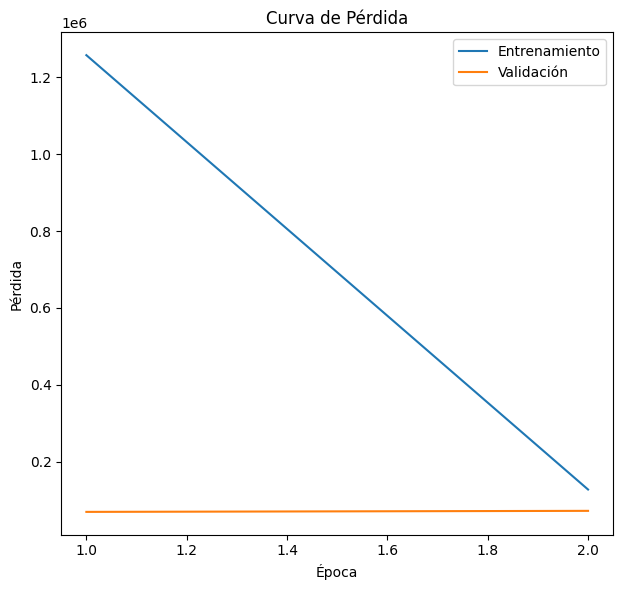

In [31]:
plt.figure(figsize=(12, 6))

# Curvas de pérdida
epochs = range(1, len(history.history['loss']) + 1)

plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], label='Entrenamiento')
plt.plot(epochs, history.history['val_loss'], label='Validación')
plt.title('Curva de Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

In [32]:
test_predict = model_v1.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


In [33]:
ruta_archivo = 'models/model_gastos_generales.txt'

with open(ruta_archivo, 'r') as archivo:
    n = float(archivo.read().strip())

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

rmse_test = np.sqrt(mean_squared_error(test_predict, y_test))
print("RMSE (prueba):", rmse_test)
r2_test = r2_score(test_predict, y_test)
print("R^2 (prueba):", r2_test)

RMSE (prueba): 210.4283552899452
R^2 (prueba): 0.6783491373062134


In [35]:
if r2_test > n:
    model_v1.save('models/model_v2.h5')
    try:
        with open(ruta_archivo, 'w') as archivo:
            archivo.write(str(r2_test))
        print(f'El nuevo mejor valor es {r2_test} y ha sido escrito en el archivo {ruta_archivo}.')
    except IOError as e:
        print(f'Error al escribir en el archivo {ruta_archivo}: {e}')
else:
    print(f'El mejor valor sigue siendo {n}')

El mejor valor sigue siendo 0.8853643536567688


In [36]:
num_columnas = x_train.shape[1]

for i in range(10):    
    print(f"----------{i}----------")

    model_v1 = keras.Sequential([
        keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu', input_shape=(num_columnas,)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation='relu')  
    ])

    model_v1.compile(optimizer='adam', loss='mean_squared_error')

    history = model_v1.fit(x_train, y_train, epochs=2, batch_size=10, validation_data=(x_val, y_val))

    test_predict = model_v1.predict(x_test)

    ruta_archivo = 'models/model_gastos_generales.txt'

    with open(ruta_archivo, 'r') as archivo:
        n = float(archivo.read().strip())

    rmse_test = np.sqrt(mean_squared_error(test_predict, y_test))
    print("RMSE (prueba):", rmse_test)
    r2_test = r2_score(test_predict, y_test)
    print("R^2 (prueba):", r2_test)

    if r2_test > n:
        model_v1.save('models/model_v2.h5')
        try:
            with open(ruta_archivo, 'w') as archivo:
                archivo.write(str(r2_test))
            print(f'El nuevo mejor valor es {r2_test} y ha sido escrito en el archivo {ruta_archivo}.')
        except IOError as e:
            print(f'Error al escribir en el archivo {ruta_archivo}: {e}')
    else:
        print(f'El mejor valor sigue siendo {n}')

----------0----------
Epoch 1/2


c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2961640.0000 - val_loss: 773166.6250
Epoch 2/2
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 539775.5625 - val_loss: 607858.6250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
RMSE (prueba): 714.221289670694
R^2 (prueba): -0.4747267961502075
El mejor valor sigue siendo 0.8853643536567688
----------1----------
Epoch 1/2


c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 2924802.5000 - val_loss: 886729.6875
Epoch 2/2
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 674072.3750 - val_loss: 520323.9688
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001F8B0497E20> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
RMSE (prueba): 587.0

c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 2951899.7500 - val_loss: 411983.6562
Epoch 2/2
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 567640.0000 - val_loss: 1494220.7500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
RMSE (prueba): 917.2996558157458
R^2 (prueba): -1.0857887268066406
El mejor valor sigue siendo 0.8853643536567688
----------3----------
Epoch 1/2


c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 3046096.2500 - val_loss: 286985.3125
Epoch 2/2
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 644311.5000 - val_loss: 304193.8125
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
RMSE (prueba): 514.419058722389
R^2 (prueba): 0.4544071555137634
El mejor valor sigue siendo 0.8853643536567688
----------4----------
Epoch 1/2


c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 2840592.7500 - val_loss: 958809.7500
Epoch 2/2
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 615043.7500 - val_loss: 165383.3125
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
RMSE (prueba): 550.463413779361
R^2 (prueba): -1.5291099548339844
El mejor valor sigue siendo 0.8853643536567688
----------5----------
Epoch 1/2


c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2955218.2500 - val_loss: 269351.3125
Epoch 2/2
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 582580.4375 - val_loss: 240307.6562
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
RMSE (prueba): 512.1394980529954
R^2 (prueba): -0.18600046634674072
El mejor valor sigue siendo 0.8853643536567688
----------6----------
Epoch 1/2


c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 2909244.2500 - val_loss: 313087.2188
Epoch 2/2
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 496976.3125 - val_loss: 512259.7812
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
RMSE (prueba): 722.7973615528969
R^2 (prueba): -1.2940187454223633
El mejor valor sigue siendo 0.8853643536567688
----------7----------
Epoch 1/2


c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 2857943.2500 - val_loss: 198748.1406
Epoch 2/2
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 301456.6250 - val_loss: 198704.1719
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
RMSE (prueba): 398.88599520109705
R^2 (prueba): -1.7929999828338623
El mejor valor sigue siendo 0.8853643536567688
----------8----------
Epoch 1/2


c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 2757828.2500 - val_loss: 215097.4375
Epoch 2/2
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 329315.2188 - val_loss: 157414.6719
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
RMSE (prueba): 323.1265775316244
R^2 (prueba): 0.09969115257263184
El mejor valor sigue siendo 0.8853643536567688
----------9----------
Epoch 1/2


c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2925052.0000 - val_loss: 111984.2188
Epoch 2/2
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 327323.1250 - val_loss: 154447.4844
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
RMSE (prueba): 313.6909764343534
R^2 (prueba): 0.1429429054260254
El mejor valor sigue siendo 0.8853643536567688
